# HOLT-WINTERS

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import*
import seaborn as sns
%matplotlib inline
sns.set()

Grafik Data

In [2]:
df = pd.read_csv('dataset_holt_winters.csv')
df

,BulanTahun,DataAktual
0,Jan-11,12172
1,Feb-11,14270
2,Mar-11,15600
3,Apr-11,14998
4,May-11,16648
...,...,...
103,Aug-19,24623
104,Sep-19,18913
105,Oct-19,21518
106,Nov-19,20798


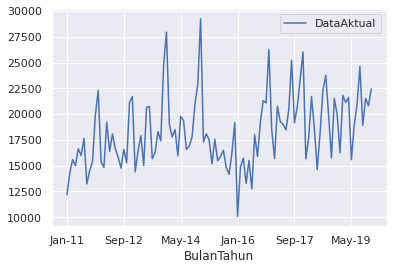

In [3]:
df.plot.line(x = 'BulanTahun', 
             y = 'DataAktual')
plt.show()

Read Dataset

In [4]:
#importing data
df = pd.read_csv('dataset_holt_winters.csv')
data = df.iloc[:,1]
data.head()

0    12172
1    14270
2    15600
3    14998
4    16648
Name: DataAktual, dtype: int64

Inialisasi Nilai Awal, Nilai Smoothing & Nilai Prediksi

In [5]:
# 1. Menghitung Nilai Awal Pemodelan
# 1a. Menghitung Nilai Smoothing
def smoothingAwal(data):
    data_asli = data.iloc[:12,]
    S = []
    total = 0
    for x in data_asli:
        total = total + x
    smoothing = 1/12*(total)
    S.append(smoothing)
    return S

#Sl = 1/l(X1+X2+...+Xl)

# 1b. Menghitung Nilai Awal Musiman
def nilaiAwalMusimanMultiplicative(data, nilaiSmoothing):
    L = []
    data_asli = data.iloc[:12,]
    for x in data_asli:
        nilaiMusim = x/nilaiSmoothing[0]
        L.append(nilaiMusim)
    return L

#Lt = Xt/Sl

# 1b. Menghitung Nilai Awal Musiman
def nilaiAwalMusimanAdditive(data, nilaiSmoothing):
    L = []
    data_asli = data.iloc[:12,]
    for x in data_asli:
        nilaiMusim = x-nilaiSmoothing[0]
        L.append(nilaiMusim)
    return L

#Lt = Xt-Sl

# 1c. Menghitung Nilai Awal Tren
def nilaiTrenAwal(data):
    tren = []
    totalTren = 0
    data_asli = data.iloc[:12,]
    data_tren = data.iloc[12:24,]
    for x in range(12):
        total = (data_tren[12+x]-data_asli[x])/12
        totalTren = totalTren + total
    trenAwal = 1/12 * (totalTren)
    tren.append(trenAwal)
    return tren

#Bl= 1/12 (Xl+1-X1)/l + (Xl+2-X2)/l+...+(Xl+l-Xl)/l

# 2. Menghitung Nilai Smoothing Additive
# 2a. menghitung nilai Smoothing Keseluruhan
def smoothingKeseluruhanAdditive(alpa, data ,nilaiSmoothing, nilaiMusiman, nilaiTren, x):
    nilai_smooth =((alpa * (data[x+12] - nilaiMusiman[x])) + ((1-alpa) * (nilaiSmoothing[x] + nilaiTren[x])))
    return  nilai_smooth

#St = a(Xt-lt-l)+(1-a)(St-1+Bt-1)

# 2b. menghitung nilai tren
def trendSmoothingAdditive(beta, nilaiSmoothing, nilaiTren,x):
    nilai_tren_smooth = ((beta * (nilaiSmoothing[x+1]-nilaiSmoothing[x])) + ((1-beta)*nilaiTren[x]))
    return nilai_tren_smooth

#Bt = b(St-St-1)+(1-b)Bt-1

# 2c. menghitung nilai Musiman
def nilaiMusimanSmoothingAdditive(gamma, data, nilaiSmoothing, nilaiMusiman, x):
    nilai_musim = ((gamma * (data[x+12]-nilaiSmoothing[x+1])) + ((1-gamma)*(nilaiMusiman[x])))
    return nilai_musim

#lt = y(Xt-St)+(1-y)lt-L

# 3. Menghitung Nilai Smoothing Multipicative
# 3a. menghitung nilai Smoothing Keseluruhan
def smoothingKeseluruhanMultiplicative(alpa, data, nilaiSmoothing, nilaiMusiman, nilaiTren, x):
    nilai_smooth = ((alpa * (data[x+12] / nilaiMusiman[x])) + ((1-alpa) * (nilaiSmoothing[x] + nilaiTren[x])))
    return nilai_smooth

#St = a(Xt/lt-l)+(1-a)(St-1+Bt-1)

# 3b. menghitung nilai tren
def trendSmoothingMultiplicative(beta, nilaiSmoothing, nilaiTren, x):
    nilai_tren_smooth = ((beta * (nilaiSmoothing[x+1]-nilaiSmoothing[x])) + ((1-beta)*nilaiTren[x]))
    return nilai_tren_smooth

#Bt = b(St-St-1)+(1-b)Bt-1

# 3c. menghitung nilai Musiman
def nilaiMusimanSmoothingMultiplicative(gamma, data, nilaiSmoothing, nilaiMusiman, x):
    nilai_musim = ((gamma * (data[x+12] / nilaiSmoothing[x+1])) + ((1-gamma)*(nilaiMusiman[x])))
    return nilai_musim

#lt = y(Xt/St)+(1-y)lt-L

# 4. Menghitung Prediksi
# menghitung nilai Prediksi Additive
def nilaiPredictAdditive(nilaiSmoothing, nilaiTren, nilaiMusiman, x):
    nilai_predict = nilaiSmoothing[x] + nilaiTren[x] + nilaiMusiman[x]
    return nilai_predict

#Ft+m = St+Btm+lt-l+m

# menghitung nilai Prediksi Multipicative
def nilaiPredictMultiplicative(nilaiSmoothing, nilaiTren, nilaiMusiman, x):
    nilai_predict = ((nilaiSmoothing[x] + nilaiTren[x]) * (nilaiMusiman[x]))
    return nilai_predict

#Ft+m = (St+Btm)lt-l+m


Input Jumlah Iterasi

In [6]:
# Jumlah perulangan yang ingin dilakukan
iterasi = int(input("Jumlah iterasi yang ingin dilakukan "))

Jumlah iterasi yang ingin dilakukan 3


# Nilai Smoothing berdasarkan Iterasi dengan nilai parameter random

Additive

In [7]:
hasilPrediksiTrainingAdd=[]
smoothingAdd = []
musimanAdd = []
trenAdd = []
nilaiAlpa = []
nilaiBeta = []
nilaiGamma = []
nilaiMAPEAdditive = []

for y in range(iterasi):
    print("Iterasi ke : ", y+1)
    import random
    import decimal

    alpa = float(decimal.Decimal(random.randrange(0, 1000))/1000)
    nilaiAlpa.append(alpa)
    beta = float(decimal.Decimal(random.randrange(0, 1000))/1000)
    nilaiBeta.append(beta)
    gamma = float(decimal.Decimal(random.randrange(0, 1000))/1000)
    nilaiGamma.append(gamma)
    
    nilaiSmoothingAdditive = smoothingAwal(data)
    print("Nilai Smoothing Awal Additive = ", nilaiSmoothingAdditive)
   
    nilaiMusimanAdditive = nilaiAwalMusimanAdditive(data, nilaiSmoothingAdditive)
    print("Nilai Musiman Awal Additive = ", nilaiMusimanAdditive)
    
    nilaiTrenAdditive = nilaiTrenAwal(data)
    print("Nilai Tren Awal Additive = ", nilaiTrenAdditive)
    
    data_pakai = data.iloc[12:,]
    predictAdditive=[]
    
    for x in range(0, len(data_pakai)):
        #Additive
        nilai_smooth_additive = smoothingKeseluruhanAdditive(alpa, data_pakai ,nilaiSmoothingAdditive, nilaiMusimanAdditive, nilaiTrenAdditive, x)
        nilaiSmoothingAdditive.append(nilai_smooth_additive)

        nilai_tren_additive = trendSmoothingAdditive(beta, nilaiSmoothingAdditive, nilaiTrenAdditive, x)
        nilaiTrenAdditive.append(nilai_tren_additive)

        nilai_musim_additive = nilaiMusimanSmoothingAdditive(gamma, data_pakai, nilaiSmoothingAdditive, nilaiMusimanAdditive, x)
        nilaiMusimanAdditive.append(nilai_musim_additive)

        nilai_predict_additive = nilaiPredictAdditive(nilaiSmoothingAdditive, nilaiTrenAdditive, nilaiMusimanAdditive, x)
        predictAdditive.append(nilai_predict_additive)

    MAPEAdditive = 0
    errorAdditive = 0
    
    for i in range (0, len(data_pakai)):
        totalAdditive = abs((predictAdditive[i] - data_pakai[i+12])/predictAdditive[i]) 
        errorAdditive = errorAdditive + totalAdditive
        
    MAPEAdditive = errorAdditive / (len(data_pakai))
    nilaiMAPEAdditive.append(MAPEAdditive)

    print("Nilai alpa >>>>>>>", alpa)
    print("Nilai beta >>>>>>>", beta)
    print("Nilai gamma >>>>>>>", gamma)
    print("MAPE Additive >>>>>>>", MAPEAdditive*100, "\n")
    
    smoothingAdd.append(nilaiSmoothingAdditive)
    musimanAdd.append(nilaiMusimanAdditive)
    trenAdd.append(nilaiTrenAdditive)
    hasilPrediksiTrainingAdd.append(predictAdditive)

Iterasi ke :  1
Nilai Smoothing Awal Additive =  [16054.166666666666]
Nilai Musiman Awal Additive =  [-3882.166666666666, -1784.166666666666, -454.16666666666606, -1056.166666666666, 593.8333333333339, -75.16666666666606, 1591.833333333334, -2829.166666666666, -1537.166666666666, -662.1666666666661, 3852.833333333334, 6241.833333333334]
Nilai Tren Awal Additive =  [91.63194444444443]
Nilai alpa >>>>>>> 0.283
Nilai beta >>>>>>> 0.485
Nilai gamma >>>>>>> 0.984
MAPE Additive >>>>>>> 13.186791639999495 

Iterasi ke :  2
Nilai Smoothing Awal Additive =  [16054.166666666666]
Nilai Musiman Awal Additive =  [-3882.166666666666, -1784.166666666666, -454.16666666666606, -1056.166666666666, 593.8333333333339, -75.16666666666606, 1591.833333333334, -2829.166666666666, -1537.166666666666, -662.1666666666661, 3852.833333333334, 6241.833333333334]
Nilai Tren Awal Additive =  [91.63194444444443]
Nilai alpa >>>>>>> 0.713
Nilai beta >>>>>>> 0.757
Nilai gamma >>>>>>> 0.273
MAPE Additive >>>>>>> 17.003961

Multiplicative

In [8]:
hasilPrediksiTrainingMul=[]
smoothingMul = []
musimanMul = []
trenMul = []
nilaiAlpa = []
nilaiBeta = []
nilaiGamma = []
nilaiMAPEMultiplicative = []
 
for y in range(iterasi):
    print("Iterasi ke : ", y+1)
    import random
    import decimal

    alpa = float(decimal.Decimal(random.randrange(0, 1000))/1000)
    nilaiAlpa.append(alpa)
    beta = float(decimal.Decimal(random.randrange(0, 1000))/1000)
    nilaiBeta.append(beta)
    gamma = float(decimal.Decimal(random.randrange(0, 1000))/1000)
    nilaiGamma.append(gamma)
    
    nilaiSmoothingMultiplicative = smoothingAwal(data)
    print("Nilai Smoothing Awal Multiplicative = ", nilaiSmoothingMultiplicative)
    
    nilaiMusimanMultiplicative = nilaiAwalMusimanMultiplicative(data, nilaiSmoothingMultiplicative)
    print("Nilai Musiman Awal Multiplicative = ", nilaiMusimanMultiplicative)
    
    nilaiTrenMultiplicative = nilaiTrenAwal(data)
    print("Nilai Tren Awal Multiplicative = ", nilaiTrenMultiplicative)
    data_pakai = data.iloc[12:,]
    
    predictMultiplicative=[]
    for x in range(0, len(data_pakai)):
        #Multiplicative
        nilai_smooth_multiplicative = smoothingKeseluruhanMultiplicative(alpa, data_pakai ,nilaiSmoothingMultiplicative, nilaiMusimanMultiplicative, nilaiTrenMultiplicative, x)
        nilaiSmoothingMultiplicative.append(nilai_smooth_multiplicative)

        nilai_tren_multiplicative = trendSmoothingMultiplicative(beta, nilaiSmoothingMultiplicative, nilaiTrenMultiplicative, x)
        nilaiTrenMultiplicative.append(nilai_tren_multiplicative)

        nilai_musim_multiplicative = nilaiMusimanSmoothingMultiplicative(gamma, data_pakai, nilaiSmoothingMultiplicative, nilaiMusimanMultiplicative, x)
        nilaiMusimanMultiplicative.append(nilai_musim_multiplicative)

        nilai_predict_multiplicative = nilaiPredictMultiplicative(nilaiSmoothingMultiplicative, nilaiTrenMultiplicative, nilaiMusimanMultiplicative, x)
        predictMultiplicative.append(nilai_predict_multiplicative)
      
    MAPEMultiplicative = 0
    errorMultiplicative = 0
    
    for i in range (0, len(data_pakai)):
        totalMultiplicative = abs((predictMultiplicative[i] - data_pakai[i+12])/predictMultiplicative[i])
        errorMultiplicative = errorMultiplicative + totalMultiplicative
    
    MAPEMultiplicative = errorMultiplicative / (len(data_pakai))
    nilaiMAPEMultiplicative.append(MAPEMultiplicative)
    print("Nilai alpa >>>>>>>", alpa)
    print("Nilai beta >>>>>>>", beta)
    print("Nilai gamma >>>>>>>", gamma)
    print("MAPE Multiplicative >>>>>>>", MAPEMultiplicative*100, "\n")
    
      
    smoothingMul.append(nilaiSmoothingMultiplicative)
    musimanMul.append(nilaiMusimanMultiplicative)
    trenMul.append(nilaiTrenMultiplicative)
    hasilPrediksiTrainingMul.append(predictMultiplicative)

Iterasi ke :  1
Nilai Smoothing Awal Multiplicative =  [16054.166666666666]
Nilai Musiman Awal Multiplicative =  [0.7581832338437582, 0.8888658188424604, 0.9717103555670906, 0.934212302102258, 1.036989358941085, 0.9953179340773424, 1.099153906047236, 0.8237736828445368, 0.904251232805606, 0.9587542174928627, 1.2399896184791073, 1.3887983389566572]
Nilai Tren Awal Multiplicative =  [91.63194444444443]
Nilai alpa >>>>>>> 0.552
Nilai beta >>>>>>> 0.037
Nilai gamma >>>>>>> 0.87
MAPE Multiplicative >>>>>>> 11.510045989593593 

Iterasi ke :  2
Nilai Smoothing Awal Multiplicative =  [16054.166666666666]
Nilai Musiman Awal Multiplicative =  [0.7581832338437582, 0.8888658188424604, 0.9717103555670906, 0.934212302102258, 1.036989358941085, 0.9953179340773424, 1.099153906047236, 0.8237736828445368, 0.904251232805606, 0.9587542174928627, 1.2399896184791073, 1.3887983389566572]
Nilai Tren Awal Multiplicative =  [91.63194444444443]
Nilai alpa >>>>>>> 0.136
Nilai beta >>>>>>> 0.257
Nilai gamma >>>>>>

Nilai Parameter Terbaik

In [9]:
MAPEterkecilAdd = nilaiMAPEAdditive[0]
MAPEterkecilMul = nilaiMAPEMultiplicative[0]
alpaFinalAdd = nilaiAlpa[0]
betaFinalAdd = nilaiBeta[0]
gammaFinalAdd = nilaiGamma[0]
alpaFinalMul = nilaiAlpa[0]
betaFinalMul = nilaiBeta[0]
gammaFinalMul = nilaiGamma[0]
smoothFinalAdd = smoothingAdd[0]
smoothFinalMul = smoothingMul[0]
musimanFinalAdd = musimanAdd[0]
musimanFinalMul = musimanMul[0]
trenFinalAdd = trenAdd[0]
trenFinalMul = trenMul[0]
#Untuk Additive
for x in range(iterasi - 1):
    if MAPEterkecilAdd < nilaiMAPEAdditive[x+1]:
        alpaFinalAdd = alpaFinalAdd
        betaFinalAdd = betaFinalAdd
        gammaFinalAdd = gammaFinalAdd
        smoothFinalAdd = smoothFinalAdd
        musimanFinalAdd = musimanFinalAdd
        trenFinalAdd = trenFinalAdd
    else:
        MAPEterkecilAdd = nilaiMAPEAdditive[x+1]
        alpaFinalAdd = nilaiAlpa[x+1]
        betaFinalAdd = nilaiBeta[x+1]
        gammaFinalAdd = nilaiGamma[x+1]
        smoothFinalAdd = smoothingAdd[x+1]
        musimanFinalAdd = musimanAdd[x+1]
        trenFinalAdd = trenAdd[x+1]
#Untuk Multipicative        
for x in range(iterasi - 1):
    if MAPEterkecilMul < nilaiMAPEMultiplicative[x+1]:
        alpaFinalMul = alpaFinalMul
        betaFinalMul = betaFinalMul
        gammaFinalMul = gammaFinalMul
        smoothFinalMul = smoothFinalMul
        musimanFinalMul = musimanFinalMul
        trenFinalMul = trenFinalMul
    else:
        MAPEterkecilMul = nilaiMAPEMultiplicative[x+1]
        alpaFinalMul = nilaiAlpa[x+1]
        betaFinalMul = nilaiBeta[x+1]
        gammaFinalMul = nilaiGamma[x+1]
        smoothFinalMul = smoothingMul[x+1]
        musimanFinalMul = musimanMul[x+1]
        trenFinalMul = trenMul[x+1]

In [10]:
print("Alpa, beta, gamma Additive: ",alpaFinalAdd, betaFinalAdd, gammaFinalAdd)
print("Alpa, beta, gamma Multiplicative: ",alpaFinalMul, betaFinalMul, gammaFinalMul)
print("MAPE terkecil Additive:",MAPEterkecilAdd*100 )
print("MAPE terkecil Multiplicative:",MAPEterkecilMul*100 )

Alpa, beta, gamma Additive:  0.552 0.037 0.87
Alpa, beta, gamma Multiplicative:  0.552 0.037 0.87
MAPE terkecil Additive: 13.186791639999495
MAPE terkecil Multiplicative: 11.510045989593593


Nilai Prediksi Multiplicative Holt-Winters

In [11]:
smoothMulFinal = [smoothFinalMul[len(data_pakai)]]
musimanMulFinal = musimanFinalMul[(len(data_pakai)):]
trenMulFinal = [trenFinalMul[len(data_pakai)]]
prediksiMul = []
for x in range(12):
    predik = (smoothMulFinal[x] + trenMulFinal[x])*musimanMulFinal[x]
    prediksiMul.append(predik)
    smoothing = ((alpaFinalMul * (prediksiMul[x]/musimanMulFinal[x])) + ((1-alpaFinalMul) * (smoothMulFinal[x] + trenMulFinal[x])))
    smoothMulFinal.append(smoothing)
    trensmoothing = ((betaFinalMul*((smoothMulFinal[x+1])-(smoothMulFinal[x]))) + ((1-betaFinalMul)*trenMulFinal[x]))
    trenMulFinal.append(trensmoothing)
    musim = (gammaFinalMul*(prediksiMul[x]/smoothMulFinal[x+1])) + ((1-gammaFinalMul)*musimanMulFinal[x])
    musimanMulFinal.append(musim)

In [12]:
data = prediksiMul
df = pd.DataFrame(data, 
                  columns=["Prediksi Wisatawan"],
                  index=['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 
                        'Agustus', 'September', 'Oktober', 'November', 'Desember'])
df

,Prediksi Wisatawan
Januari,17323.435353
Februari,19674.739670
Maret,20263.670074
April,18663.565074
Mei,15218.397575
Juni,18600.116115
Juli,21103.376994
Agustus,22705.294541
September,17809.276960
Oktober,18186.781109


Nilai Prediksi Additive Holt-Winters

In [13]:
smoothAddFinal = [smoothFinalAdd[len(data_pakai)]]
musimanAddFinal = musimanFinalAdd[(len(data_pakai)):]
trenAddFinal = [trenFinalAdd[len(data_pakai)]]
prediksiAdd = []
for x in range(12):
    pred = smoothAddFinal[x] + musimanAddFinal[x] + trenAddFinal[x]
    prediksiAdd.append(pred)
    smoothing = ((alpaFinalAdd*(prediksiAdd[x]-musimanAddFinal[x]))+ ((1-alpaFinalAdd)*(smoothAddFinal[x]-trenAddFinal[x])))
    smoothAddFinal.append(smoothing)
    trensmoothing = ((betaFinalAdd*((smoothAddFinal[x+1])-(smoothAddFinal[x]))) + ((1-betaFinalAdd)*trenAddFinal[x]))
    trenAddFinal.append(trensmoothing) 
    musim = (gammaFinalAdd*(prediksiAdd[x]-smoothAddFinal[x+1])) + ((1-gammaFinalAdd)*musimanAddFinal[x])
    musimanAddFinal.append(musim)

In [14]:
data = prediksiAdd
df = pd.DataFrame(data, 
                  columns=["Prediksi Wisatawan"],
                  index=['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 
                        'Agustus', 'September', 'Oktober', 'November', 'Desember'])
df

,Prediksi Wisatawan
Januari,19147.554598
Februari,23217.479262
Maret,22258.671414
April,21570.342927
Mei,15508.925368
Juni,19078.806176
Juli,21832.941922
Agustus,25534.727689
September,20044.655305
Oktober,21144.296008
